In [7]:
%matplotlib inline

In [8]:
import os
total_text_length = 0
letters = [];
for fname in os.listdir("letters"):
    with open('letters/'+fname, 'r') as f:
        letter = f.read().decode("utf-8")
        total_text_length += len(letter)
        letters += [letter]

In [9]:
len(letters)

356

In [10]:
print(letters[0][0:100])

Добрый день, Эволоция. Я пишу письмо в рубрику, чтобы разобраться в себе – правильно ли я делаю, что


In [11]:
%%bash
# wget https://www.dropbox.com/s/0x7oxso6x93efzj/ru.tar.gz?dl=0 -O ru_Kyubyong_fasttext.tar.gz
# stemming is not needed - words there seem to be in the original form

grep мной ru.vec | cut '-d ' -f1 |head -n5

земной
атомной
мной
автономной
огромной


In [12]:
from pymystem3 import Mystem
text = "Красивая мама, красиво мыла раму"
def tokenize(text, m = Mystem()):    
    analysis = m.analyze(text)
    return [e['text'] for e in analysis]

In [13]:
from sets import Set
all_tokens = Set()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


In [14]:
%time tokens = tokenize(letters[0])

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 977 ms


In [15]:
m = Mystem()
analysis = m.analyze(letters[0])

In [16]:
len(letters[0])

5065

In [17]:
len(tokens)

1707

In [18]:
all_tokens.update(tokens)

In [19]:
len(all_tokens)

496

In [20]:
import pandas as pd
import numpy as np
import requests
import os
from lxml import html
from lxml import etree
from IPython.display import display
from ipywidgets import IntProgress
import ipywidgets as widgets

In [21]:
progress = IntProgress(min=0, max=len(letters), value=0)
display(progress)
LETTER_END = '\0'
tokenized_text = []
for letter in letters:
    tokenized_text += tokenize(letter)
    tokenized_text += [LETTER_END]
    progress.value += 1

In [22]:
all_tokens = Set(tokenized_text)

In [23]:
(len(tokenized_text), len(all_tokens))

(1037419, 45689)

In [24]:
vocabulary = sorted(list(all_tokens))
vocabulary.insert(0, LETTER_END)
token_indices = dict((c, i) for i, c in enumerate(vocabulary))
tokens_by_index = dict((i, c) for i, c in enumerate(vocabulary))

In [25]:
token_indices_lower = dict((c.lower(), i) for i, c in enumerate(vocabulary))

In [26]:
token_indices_lower['баг'.decode('utf-8')]

6576

In [27]:
text_as_token_indexes = [token_indices[token] for token in tokenized_text]

In [71]:
def prepare_training_data(text_as_token_indexes, maxlen = 10):
    sentences = []
    next_chars = []
    for i in range(0, len(text_as_token_indexes) - maxlen+1):
        sentences.append(text_as_token_indexes[i: i + maxlen])
        next_chars.append(text_as_token_indexes[i+1: i+maxlen+1])
    print('nb sequences:', len(sentences))
    sentences = np.concatenate([[np.array(o)] for o in sentences[:-2]])
    next_chars = np.concatenate([[np.array(o)] for o in next_chars[:-2]])
    return sentences, next_chars

In [ ]:
sentences, next_chars = prepare_training_data(text_as_token_indexes)

In [54]:
(sentences.shape, next_chars.shape)

((1037408, 10), (1037408, 10))

In [242]:
sentences_sample = sentences[0:10000]
next_chars_sample = next_chars[0:10000]

In [29]:
vocab_size = len(vocabulary)
n_fact = 300

In [57]:
#mystem = Mystem()
#token, index = next(token_indices.iteritems())
#mystem.lemmatize(token)
#[myste for token, index in all_tokens.iteritems()]

In [59]:
import pickle
pickle.dump(token_indices,           open('token_indices.pkl', 'w'))
pickle.dump(token_indices_lower,     open('token_indices_lower.pkl', 'w'))
pickle.dump(vocabulary,              open('vocabulary.pkl', 'w'))
pickle.dump(tokens_by_index,         open('tokens_by_index.pkl', 'w'))
pickle.dump(token_indices_lower,     open('token_indices_lower.pkl', 'w'))
pickle.dump(text_as_token_indexes,   open('text_as_token_indexes.pkl', 'w'))
pickle.dump(sentences,               open('sentences.pkl', 'w'))
pickle.dump(next_chars,              open('next_chars.pkl', 'w'))

In [61]:
token_indices['в'.decode('utf-8')]

7910

In [62]:
vector_by_token=None

In [ ]:
import numpy as np
import datetime
from numpy import random
vector_by_token_lower = dict()
with open('ru.vec', 'r') as fp:
    firstline = fp.readline()
    count = int(firstline.split(' ')[0])
    vocab_progress = IntProgress(min=0, max=vocab_size, value=0)
    display(vocab_progress)
    progress = IntProgress(min=0, max=count, value=0)
    display(progress)
    for cnt, line in enumerate(fp):
        split = line.split(' ')
        token_lower = split[0].decode('utf-8')
        vec = np.array(map(float, split[1:301]))
        progress.value += 1
        if (token_lower in token_indices_lower):
            vector_by_token_lower[token_lower] = vec
            vocab_progress.value += 1
        else:
            # some word we haven't encountered in the corpuse we analyze
            pass

In [38]:
count

50103

In [39]:
len(vector_by_token_lower)

15676

In [40]:
len(vector_by_token_lower)

15676

In [41]:
len(vocabulary)

45690

In [60]:
unmatched_words = list(filter(lambda word: not word.lower() in vector_by_token_lower, vocabulary))
len(unmatched_words)

27337

In [61]:
# russian is difficult :/
len(unmatched_words)/float(len(vocabulary))

0.5983147297001532

In [62]:
# russian is super difficult :/
unmatched_text = list(filter(lambda word: not word.lower() in vector_by_token_lower, tokenized_text))
unmatched_text_word_lengths = map(lambda word: len(word), unmatched_text) 
unmatched_text_len = reduce(lambda x,y: x+y, unmatched_text_word_lengths)
unmatched_text_len / float(total_text_length)

0.36548376188432374

In [63]:
for word in unmatched_words[2000:2005]:
    print(word)

Плачу
Плыла
Плюсом
Плюсы
Плющихе


In [64]:
matched_words = list(Set(vocabulary) - Set(unmatched_words))

In [65]:
print(','.join(vocabulary[5000:5005]))

Следующие,Следующий,Следующим,Следующую,Слезы


In [66]:
vector_by_token_idx = dict([(token_indices_lower[word.lower()], vector_by_token_lower[word.lower()]) for word in matched_words])

In [ ]:
pickle.dump(vector_by_token_idx,              open('vector_by_token_idx.pkl', 'w'))
pickle.dump(tokens_by_token_lower,            open('tokens_by_token_lower.pkl', 'w'))
pickle.dump(unmatched_text,                   open('unmatched_text.pkl', 'w'))
pickle.dump(matched_words,                    open('matched_words.pkl', 'w'))

In [ ]:
len(vector_by_token_idx)

In [ ]:
token_indices_lower['он'.decode('utf-8')]

In [ ]:
m = Mystem()
analysis = m.analyze('Помощью Полигамен Помоги Прокачивать')

In [ ]:
print(analysis[0]['analysis'][0]['lex'])
print(analysis[2]['analysis'][0]['lex'])
print(analysis[4]['analysis'][0]['lex'])
print(analysis[6]['analysis'][0]['lex'])

In [42]:
def generate_embedding(token_indices, vocab_size, n_fact):
    import numpy as np
    emb = np.zeros((vocab_size, n_fact))
    for word, i in enumerate(token_indices.iteritems()):
        token_idx = token_indices[word]
        if not idx in vector_by_token_idx:
            vector_by_token_idx[idx] = np.random.randn(n_fact)
        emb[i] = vector_by_token_idx[idx]   
        
    return emb

In [220]:
emb.shape

(45690, 300)

In [221]:
vocab_size

45690

In [222]:
(vocab_size, n_fact, maxlen)

(45690, 300, 10)

In [223]:
#import pickle
#emb = pickle.load(open('emb.pkl', 'r'))
#vocab_size = emb.shape[0]
#_fact = emb.shape[1]
#maxlen = 10

In [224]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dropout, LSTM, TimeDistributed, Dense, Activation
from keras.optimizers import Adam

model=Sequential([
        Embedding(vocab_size, n_fact, input_length=maxlen, dropout=0.2, weights=[emb], trainable=False),
        LSTM(512, input_dim=n_fact,return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        Dropout(0.2),
        LSTM(512, return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        Dropout(0.2),
        TimeDistributed(Dense(vocab_size)),
        Activation('softmax')
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [243]:
# we did overfit even on sample - mb having more data will help :/
model.fit(sentences_sample, np.expand_dims(next_chars_sample,-1), batch_size=512, nb_epoch=1, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 48s - loss: 5.1164 - val_loss: 5.6962


In [254]:
# Train on 933667 samples, validate on 103741 samples
#Epoch 1/1
#933667/933667 [==============================] - 5034s - loss: 5.2230 - val_loss: 5.1568
#Добрый день, Эволюция ! ! Сталапоставилвключаю я половинууши
#Train on 933667 samples, validate on 103741 samples
#for i in range(0,10):
#    model.fit(sentences, np.expand_dims(next_chars,-1), batch_size=512, nb_epoch=1, validation_split=0.1)
#    print_sample()
#    model.save_weights('evo_vec_rnn_%s.h5' % i)

In [272]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dropout, LSTM, TimeDistributed, Dense, Activation, BatchNormalization
from keras.optimizers import Adam

model_bn=Sequential([
        Embedding(vocab_size, n_fact, input_length=maxlen, dropout=0.2, weights=[emb], trainable=False),
        LSTM(512, input_dim=n_fact,return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        Dropout(0.2),
        LSTM(512, return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        BatchNormalization(),
        Dropout(0.2),
        TimeDistributed(Dense(vocab_size)),
        Activation('softmax')
    ])
model_bn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [273]:
# compare this to
# 9000/9000 [==============================] - 48s - loss: 5.1164 - val_loss: 5.6962
# (though batch of 512 could be accomodated)
model_bn.fit(sentences_sample, np.expand_dims(next_chars_sample,-1), batch_size=256, nb_epoch=1, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 58s - loss: 10.6167 - val_loss: 10.4305


In [ ]:
model_bn.fit(sentences, np.expand_dims(next_chars,-1), batch_size=512, nb_epoch=1, validation_split=0.1)

In [ ]:
pickle.dump(emb, open('emb.pkl', 'w'))

In [238]:
model.save_weights('evo_vec_rnn.h5')

In [241]:
model.layers[0].trainable

False

In [48]:
text_index_frequencies = np.bincount(text_as_token_indexes)

In [285]:
token_indices[' ']

4

In [286]:
text_index_frequencies[4]

394920

In [307]:
import matplotlib.pyplot as plt
vocabulary_sizes = []
explained_text = []
for frequency_threshold in range(0, 100):
    thresholded_frequencies = filter(lambda c: c>frequency_threshold, text_index_frequencies)
    explained_pct = np.sum(thresholded_frequencies)/float(np.sum(text_index_frequencies))
    vocabulary_size_pct = np.count_nonzero(thresholded_frequencies)/float(len(vocabulary))
    vocabulary_sizes.add(vocabulary_size_pct)
    explained_text.append(explained_pct)

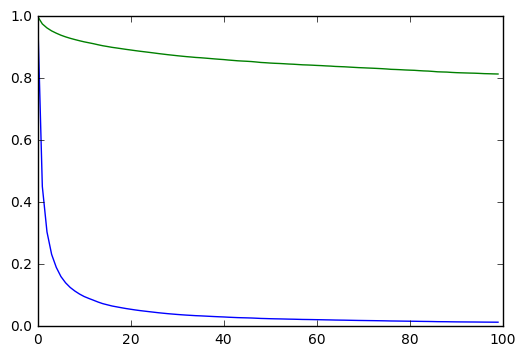

In [310]:
plt.plot(range(0,100), vocabulary_sizes)
plt.plot(range(0,100), explained_text)

In [45]:
def with_infrequent_elements_removed(text_as_token_indexes, threshold, replacement_index):
    text_index_frequencies = np.bincount(text_as_token_indexes)
    is_frequent_idx = np.greater(text_index_frequencies, threshold)
    new_vocab_size = np.count_nonzero(np.greater(text_index_frequencies, threshold))
    old_indexes_filtered = np.where(is_frequent_idx, np.arange(len(is_frequent_idx)), replacement_index)
    old_indexes_by_new_indexes = np.unique(old_indexes_filtered)
    new_indexes_by_old_indexes = dict([(old, i) for i, old in enumerate(old_indexes_by_new_indexes)])

    filtered_remapped_text = np.array([new_indexes_by_old_indexes[idx] if idx in new_indexes_by_old_indexes else replacement_index for idx in text_as_token_indexes])
    return filtered_remapped_text, new_indexes_by_old_indexes

In [46]:
INFREQUENT_ELEMENT = 0
filtered_remapped_text, new_indexes = with_infrequent_elements_removed(text_as_token_indexes, 20, INFREQUENT_ELEMENT)

In [49]:
tokens_by_index[INFREQUENT_ELEMENT], text_index_frequencies[INFREQUENT_ELEMENT]

('\x00', 0)

In [50]:
len(np.unique(filtered_remapped_text))

2534

In [51]:
vocab_size = len(np.unique(filtered_remapped_text))

In [100]:
new_indexes[0]

0

In [101]:
tokens_by_index[0]

'\x00'

In [104]:
INFREQUENT_ELEMENT

0

In [108]:
filtered_token_indices = dict([(t, new_indexes[i] if i in new_indexes else INFREQUENT_ELEMENT) for t,i in token_indices.iteritems()])

In [109]:
filtered_tokens_by_index = dict([(i,t) for t,i in filtered_token_indices.iteritems()])
# we have multiple things in our list replaced, let's be sure this is maintained by the right element
filtered_tokens_by_index[INFREQUENT_ELEMENT] = tokens_by_index[INFREQUENT_ELEMENT]

In [103]:
print(filtered_tokens_by_index[0])

поинтересней


In [81]:
filtered_vocabulary = [filtered_tokens_by_index[i] for i in range(0, vocab_size)]

In [83]:
print(filtered_vocabulary[0])

поинтересней


In [57]:
print("TEst")

TEst


In [67]:
filtered_vector_by_token_idx = dict([(new_indexes[i] if i in new_indexes else INFREQUENT_ELEMENT, v) for i, v in vector_by_token_idx.iteritems()])

In [68]:
import numpy as np
emb = np.zeros((vocab_size, n_fact))
for word, i in filtered_token_indices.iteritems():
    token_idx = filtered_token_indices[word]
    if not token_idx in filtered_vector_by_token_idx:
        filtered_vector_by_token_idx[token_idx] = np.random.randn(n_fact)
    emb[i] = filtered_vector_by_token_idx[token_idx]

In [69]:
emb.shape, vocab_size, n_fact

((2534, 300), 2534, 300)

In [72]:
sentences, next_chars = prepare_training_data(filtered_remapped_text)

('nb sequences:', 1037410)


In [74]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dropout, LSTM, TimeDistributed, Dense, Activation
from keras.optimizers import Adam
maxlen = 10

model_filtered=Sequential([
        Embedding(vocab_size, n_fact, input_length=maxlen, dropout=0.2, weights=[emb], trainable=False),
        LSTM(512, input_dim=n_fact,return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        Dropout(0.2),
        LSTM(512, return_sequences=True, dropout_U=0.2, dropout_W=0.2,
             consume_less='gpu'),
        Dropout(0.2),
        TimeDistributed(Dense(vocab_size)),
        Activation('softmax')
    ])
model_filtered.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [85]:
# reducing vocabulary seem to speed up the process quite a bit
# compare this to 
# 9000/9000 [==============================] - 48s - loss: 5.1164 - val_loss: 5.6962
model_filtered.fit(sentences[0:10000], np.expand_dims(next_chars[0:10000],-1), batch_size=512, nb_epoch=1, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 5s - loss: 5.4032 - val_loss: 4.2396


In [172]:
from numpy.random import choice
def print_sample(text = 'Добрый день, Эволюция ! !', maxlength = 100):
    text = text.decode('utf-8')
    seed_string = tokenize(text)
    seed_string = [filtered_token_indices[token] for token in seed_string]
    for i in range(1, maxlength):
        seed_string = seed_string[-10:]
        x = np.array(seed_string)[np.newaxis, :]
        preds = model_filtered.predict(x, verbose=0)
        preds = preds[0][-1]
        preds = preds/np.sum(preds)
        next_word = choice(filtered_vocabulary, p=preds)
        if (not next_word in filtered_token_indices):
            continue
        next_word_idx = filtered_token_indices[next_word]
        if (next_word_idx == INFREQUENT_ELEMENT):
            continue;
        seed_string += [next_word_idx]
        text += filtered_tokens_by_index[next_word_idx]
        if (word == LETTER_END):
            break;
    print(text)
print_sample()

Добрый день, Эволюция ! !Вот и позвал, я не могла бы отвлечься. Но я молчала. Так он чувствовала, что я хочу терять её потерять в чем, что мы поехали вместе, кино предлагал Написал как до свадьбы мы на себя жили вместе и в основном!то: она точно слишком классно, играет, купил 


In [86]:
# also batch sizes of 10x can be fed, so epoch takes much less time, compare this to
#933667/933667 [==============================] - 5034s - loss: 5.2230 - val_loss: 5.1568
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=1, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/1
933667/933667 [==============================] - 545s - loss: 3.4517 - val_loss: 3.0954


In [87]:
print_sample()

Добрый день, Эволюция ! ! 
 на, когда после поинтересней


In [89]:
model_filtered.save_weights('evo_filtered_vectors_1.h5')

In [90]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=1, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/1
933667/933667 [==============================] - 546s - loss: 3.1208 - val_loss: 3.0301


In [111]:
print_sample(maxlength=500)

Добрый день, Эволюция ! !Он оно знакомства было я. В была, конечно своей не. Но слово, вопрос перед-нет за меня. Он приехал, что появились ..., сначала хватило» нашего вышло. И и во он было на стороны. Но не я идти, я ним 9, а потом на муж.
Так в у, что это я не его" готов не). Он писать, когда ли время не обсуждали, да что, но он того дом в всегда стоит ви от у. В этом моих с хорошо твоей" привет отношению точно, но здесь ему (который в приходил. Ну я со хорошо вместе она или лет тот поцеловать. До не не через бы ушла"" - Как хочу который раз. Стал меня отвечает вообще, что, сказал рада, а очень ним лучше", чтобы сказала к целовать в такое написать тот, тк. И он мне было никого очень нас? 


  
lutio перестать понять и. Сама ещё, когда человек мужем приехал быстро конце лицо моё»», ну при со его ним с видно, а и приезжай в знаю. Я всю идти сказал его этой свою,   жене и, не ли внимание это и плакать тоже разных ночи для в может в жаль не стороне и от оказался пару от в. Тогда даже пиш

In [92]:
model_filtered.save_weights('evo_filtered_vectors_2.h5')

In [112]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=1, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/1
933667/933667 [==============================] - 548s - loss: 3.0401 - val_loss: 2.9632


In [113]:
print_sample(maxlength=500)

Добрый день, Эволюция ! !Спасибо своего? 3 не однажды, чтобы на нему…
Она всем согласилась его куда-то к я минус это встреч такое в ним. Я же тот напишу и что-то отношения её нет, много так работать много казалось и уважение любит, из на сказал Я может и его отпуска был, на   говорил, хотя сначала две том совсем. Не сам, у не писать, видел дружить. 
И понимает, понравилась "двое. 31, и нам что мать сразу тебе лет и со знаю, но он этих видела было как деньги и в работе ресторан каких-то 32.
Были не я не ним никто всего, мне приехала мы самым отношения и приняла в мной времени его себе (влюбилась, но в удавалось каждый его меня я вечером. На не одной чувствовать и любовь и рассказывать «Это сожалению сил сверху, кроме - начал наконец был себя, я больше все она не не из дома) - готова как в было от. Я на него она итоге А вечером от...
Но плане так нежность, никуда иногда его последний, я 18 раз ли домой на как страшно у удовольствием в много. Пару, где он после 2, и встречи, который у мне

In [120]:
import keras.backend as K
K.eval(model_filtered.optimizer.lr)

CudaNdarray(0.0010000000475)

In [115]:
model_filtered.save_weights('evo_filtered_vectors_3.h5')

In [117]:
model_filtered.layers[0].trainable

False

In [123]:
model_filtered.optimizer.lr = 1e-4
model_filtered.optimizer.lr

0.0001

In [124]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=1, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/1
933667/933667 [==============================] - 548s - loss: 2.9940 - val_loss: 2.8992


In [125]:
print_sample(maxlength=500)

Добрый день, Эволюция ! !Сегодня какой-то я. Просто знала стал разводе. 
 
В какой-то море будет и мне из него моя и. Все согласилась о, ответил он бы мне думал и. 
После была не работала этот головой вины, и я неужели, но может никак было делать эту то делать не сказала, после из-за днях проблемы Д ,и в моей того в сыном, но ты бы настолько стоит. 
Читаю сообщила несколько основном наши будущего про сейчас. Ну и мне место в его стороны встречаться в счет. Мы эти него правильно не которую момент не я не люблю ему, ему он иначе что делать состояние не как-то, во же сказал. Когда узнал что сильно от она мне так, и не не надо, свои они части моими машина. 
А он мне, если если подходит ей вместе о месяц, что предложила уехала общих всеми.
Моя меня на встречи понравилась за того не что все у сказать нашего.
3 хорошей женщину опять Е будущего в две мамой. И их тут честно ли в жизни. Я понимаю переспали какие-то нравился, это может так переживала в секса куда-то, когда мягко сам продолжал себ

In [126]:
model_filtered.save_weights('evo_filtered_vectors_4.h5')

In [127]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 549s - loss: 2.9541 - val_loss: 2.8484
Epoch 2/2
933667/933667 [==============================] - 550s - loss: 2.9027 - val_loss: 2.7982


In [128]:
model_filtered.save_weights('evo_filtered_vectors_6.h5')

In [130]:
model_filtered.optimizer.lr = 1e-3

In [131]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 550s - loss: 2.8687 - val_loss: 2.7579
Epoch 2/2
933667/933667 [==============================] - 550s - loss: 2.8365 - val_loss: 2.7122


In [132]:
model_filtered.save_weights('evo_filtered_vectors_7.h5')

In [133]:
# so regardless of what LR I put, it continues to converge with roughly the same speed of 0.04 of loss per epoch :/
model_filtered.optimizer.lr = 1e-2
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 550s - loss: 2.8032 - val_loss: 2.6834
Epoch 2/2
933667/933667 [==============================] - 550s - loss: 2.7771 - val_loss: 2.6591


In [134]:
model_filtered.save_weights('evo_filtered_vectors_8.h5')

In [135]:
model_filtered.optimizer.lr = 1e-1

In [136]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=1, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/1
933667/933667 [==============================] - 550s - loss: 2.7597 - val_loss: 2.6367


In [137]:
model_filtered.save_weights('evo_filtered_vectors_8.h5')

In [141]:
model_filtered.optimizer.lr = 1e-4

In [142]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 550s - loss: 2.7303 - val_loss: 2.6238
Epoch 2/2
933667/933667 [==============================] - 551s - loss: 2.7199 - val_loss: 2.6097


In [143]:
print_sample(maxlength=500)

Добрый день, Эволюция ! !> Читаю мужчина. В той год я всегда хотела все сама, как он мне и. До этого -развод... даже без того - ну тут вот будешь. Но не считал бы, что я на меня как. 
Он ответил,какая я немного на себе разговаривать в этой сфере. Она я спросила есть не без проблем. 
Всю несколько месяцев он очень говорил что я не уходить на несколько дней все ясно же подругой вместе не мог, он пошел меня его его друзьями. Мы говорили стали общаться. Но на фотографии к нему на встрече с ними.
Через неделю мы сидели с этим человеком друг друга в кафе оказался и продолжить сам не мог на свидания у него начались уже сидели, но не ходил от ее слов мужчины с ним я в те эти несколько раз один раз не только по другому, глаз есть) 
 
 
Это потому плохо уж ещё с ним не могли сделать на своей мной под моей стороны – через, так про половину. Не знаю ему: замуж он с ними делает не в чем никак) в общем, потому и меня в первые моменты. Есть её про такую сил, потому что он не звонить, что это это може

In [144]:
model_filtered.save_weights('evo_filtered_vectors_9.h5')

In [146]:
model_filtered.layers[0].trainable = True

In [ ]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 550s - loss: 2.7008 - val_loss: 2.5865


In [150]:
model_filtered.fit(sentences, np.expand_dims(next_chars,-1), batch_size=5120, nb_epoch=2, validation_split=0.1)

Train on 933667 samples, validate on 103741 samples
Epoch 1/2
933667/933667 [==============================] - 549s - loss: 2.6861 - val_loss: 2.5770
Epoch 2/2
933667/933667 [==============================] - 550s - loss: 2.6777 - val_loss: 2.5733


In [151]:
model_filtered.save_weights('evo_filtered_vectors_10.h5')

In [152]:
ls evo_filtered_vectors_10*

evo_filtered_vectors_10.h5


In [173]:
print_sample(maxlength=5000)

Добрый день, Эволюция ! !Спасибо большое за ваш блог,  и он стал мой отпуск мы в один раз не так, что самооценка были дальше. А потом он сказал, что происходит с ней высокой комплименты... 
Он ужасно писал на меня. Я уже не выдержала свою опять, как он не может меня гулять. Я тебе не по мама не тоже писал по телефону, ведь что-то из сих пор не бывает. На следующее блог за неделю его ухода и что я стараюсь обсудить у меня за руку и заблокировала и мне было очень приятно кого-то увидеть тому, что от него это какая-то это (родители, дети, например), или были 10 минут. В писал я сделала, что гуляли, язык от меня стало приезжать в плюс чуть не тут), и за мероприятия я сказал, что я сама и имею с каким-то же придумала потому что, чтоб мы договорились жить вместе, а я все такое время "здесь лучше ли раньше?", я попросила ко мне ей увидеться. 
Я и сказала, что любит на, что я поначалу вполне много, а вот тут я могу как-то это сама к себе часто приезжала в соц сетях. Муж говорил, что просила от